***Probabilidad de ataque cardíaco por SVM***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [5]:
# loading csv data to dataframe 
Heart_attack = pd.read_csv("Data/heart.csv")
# checking out the Data
Heart_attack.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
Heart_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
Heart_attack.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\victo\AppData\Local\Temp\ipykernel_10756\4042554970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = Heart_attack['age'] ,bins = 10)


Text(0, 0.5, 'count')

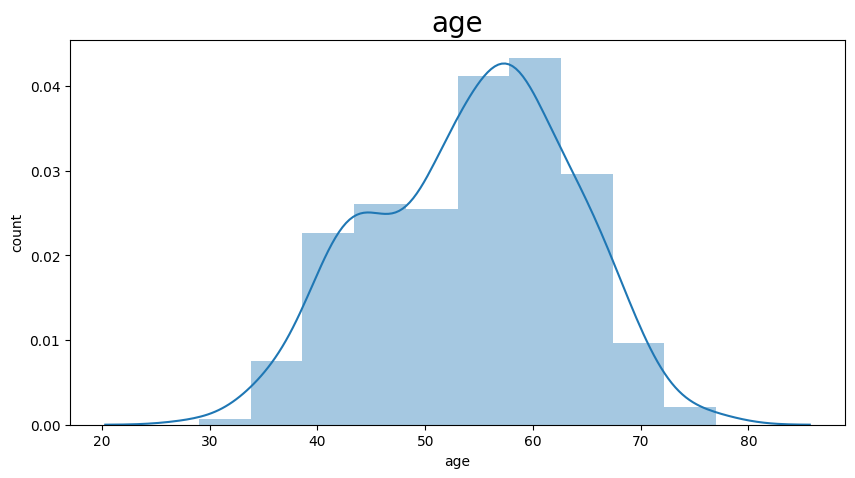

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(x = Heart_attack['age'] ,bins = 10)
plt.title('age' , size = 20)
plt.xlabel('age')
plt.ylabel('count')

C:\Users\victo\AppData\Local\Temp\ipykernel_10756\313212943.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = Heart_attack['chol'] ,bins = 10)


Text(0, 0.5, 'count')

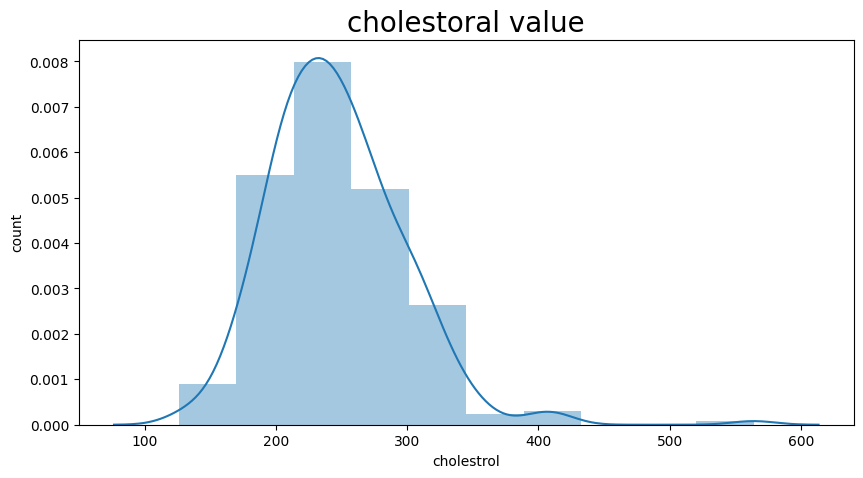

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(x = Heart_attack['chol'] ,bins = 10)
plt.title('cholestoral value' , size = 20)
plt.xlabel('cholestrol')
plt.ylabel('count')

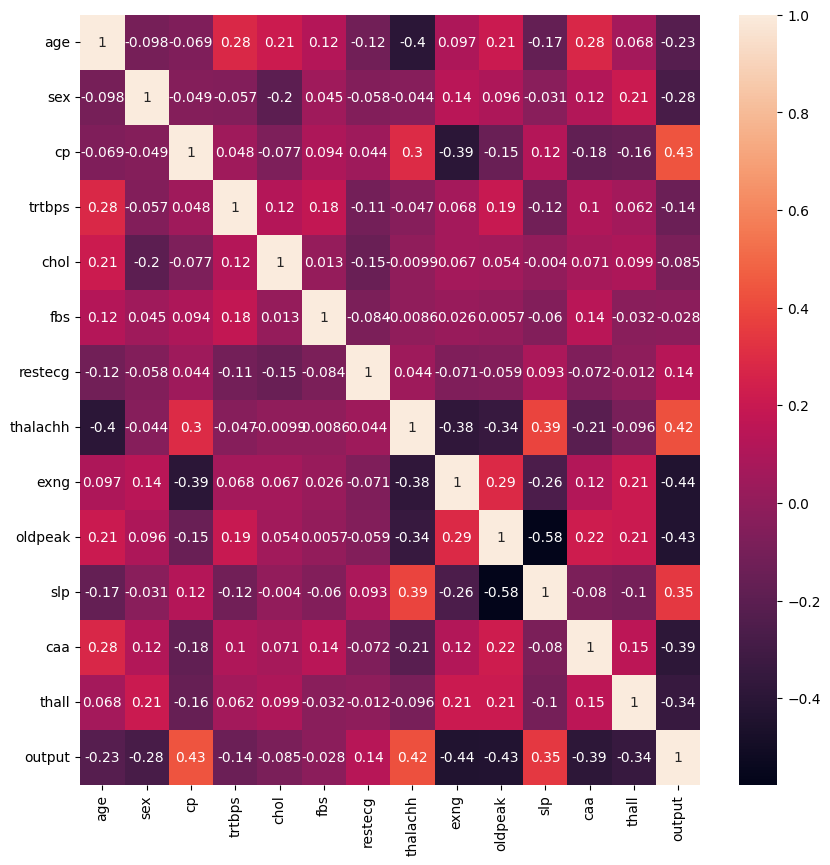

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(Heart_attack.corr(), annot=True);

In [11]:
Heart_attack.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

age: Age of the person
sex: Gender of the person
cp: Chest Pain type chest pain type
trtps: resting blood pressure (in mm Hg)
chol: cholestoral in mg/dl fetched via BMI sensor
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalachh: maximum heart rate achieved
exng: exercise induced angina (1 = yes; 0 = no)
oldpeak: Previous peak


In [12]:
Heart_attack[Heart_attack.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
Heart_attack.drop_duplicates(inplace = True)

## **Training a SVC Linear Model**


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

División de los datos en train y test

In [16]:
X = Heart_attack[['cp', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = Heart_attack["age"]

In [17]:
y = Heart_attack["age"]
y

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 302, dtype: int64

In [34]:
#Creación del modelo SVM lineal

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [19]:
model = SVC(C = 100, kernel = 'linear', random_state=123)
model.fit(X_train, y_train)

c:\Users\victo\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, kernel='linear', random_state=123)

In [20]:
prediction = model.predict(X_test)
prediction

array([57, 52, 53, 58, 58, 42, 54, 60, 58, 69, 40, 58, 40, 52, 58, 60, 67,
       41, 54, 41, 44, 39, 64, 58, 57, 49, 67, 65, 58, 65, 52, 39, 58, 58,
       57, 57, 41, 66, 41, 34, 47, 35, 52, 50, 44, 50, 61, 45, 41, 65, 53,
       69, 54, 52, 54, 34, 64, 42, 47, 58, 58], dtype=int64)

In [21]:
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 80.18179341363162
